## Kirk's Approximation for pricing Spread Options

The payoff of a spread option on two futures contracts is given by
$$c_T =  {\rm max}[0,F_1-F_2-K]  $$
where $F_1$ and $F_2$ are the prices of the future contracts and $K$ is a constant spread. Let's say you are an oil refinery then your profit depends on the difference in price between crude oil and heating oil, so you'll be interested in spread options with these two as the underlying.

In Kirk's approximation we take $Z(T)=F_2(T)+K$ to have a lognormal distribution with initial value $Z(0) = F_2+K$. The volatility for $Z$ is value wieghted  using the relative proportions for the positions:
$$\sigma_Z = \frac{F_2}{F_2+K} \sigma_2 $$


Lets' take the generalized Black-Scholes equation with
$$S= F_1 \hspace{1cm} {\rm Strike} = F_2+K$$

from which we obtain the value of the call
$$c= (F_2+K) e^{-rt}[F \, N(d_1) - N(d_2)]$$
where 
$$d_1 = \frac{\ln F + \sigma^2T/2 }{\sigma \sqrt{T}}  \hspace{1cm} d_2 = d_1 - \sigma \sqrt{T}$$
and 
$$F=\frac{F_1}{F_2+K}$$ 
The volatility of $F$ can be approximated as 
$$\sigma = \sqrt{\sigma_1^2+ \left(\frac{\sigma_2 F_2}{F_2+K}\right)^2- \frac{2 \, \rho \, \sigma_1 \sigma_2 F_2}{F_2+K}} $$
where $\rho$ is the correlation between the two futures contracts. Kirk's approoximation works for small $K$.



In [2]:
# ========================== Black-Scholes and Greeks ===========================
# Author: Alexis D. Plascencia
# We implement the Greeks for Spread Options using Kirk's approximation
# ===============================================================================

import numpy as np
import matplotlib.pylab as plt
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

## Delta

We can have either Delta with respect to $F_1$:
$$ \Delta_1 = \frac{\partial c}{\partial F_1} = e^{-rT} N(d_1) $$
or with respect to $F_2$:
$$ \Delta_2 = \frac{\partial c}{\partial F_2} = e^{-rT} \left[ -N(d_2) +(F_2+K) e^{-d_2^2/2} \sqrt{T}  \frac{\partial \sigma}{\partial F_2} \right]$$
and we have that 
$$  \frac{\partial \sigma}{\partial F_2} = \frac{ \sigma_2 K (\beta - \rho \sigma_1)  }{ \sigma (F_2+K)^2 } $$
where
$$ \beta =\frac{\sigma_2 F_2}{F_2+K} $$

In [3]:
F1 = np.linspace(0,240,240)
r = 0.1
T = 2.
K = 20.
eps = 1.e-8  # This is to avoid divergences
#F1 = 400.
F2 = 100.
F = F1/(F2+K)
sigma1=0.1
sigma2=0.1
beta = sigma2*F2/(F2+K)
rho = 0. 
sigma = np.sqrt(sigma1**2.+beta**2.-2*rho*sigma1*beta)

# We use the analytic solution for the Call and Put pricing
d1 = (np.log(F) + (0.5*sigma**2.)*T)/(sigma*np.sqrt(T) + eps)
d2 = d1 - sigma*np.sqrt(T)

Delta1 = np.exp(-r*T)*ss.norm.cdf(d1)

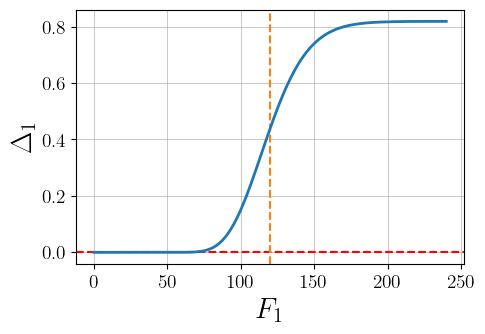

In [4]:
fig = plt.figure(figsize=(5,3.3)) 
ax = fig.gca()
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.tick_params(axis='both', which='both', direction='in')
ax.set_xlabel(r'$F_1$', fontsize=21)
ax.set_ylabel(r'$\Delta_1$', fontsize=21)
ax.axhline(0, xmin=0, xmax=1, color='red',  linewidth=1.5, ls='dashed')
ax.axvline(120, ymin=0, ymax=1, color='tab:orange',  linewidth=1.5, ls='dashed')
#ax.set_xlim(0, 200) 
#ax.set_ylim(-0.5, 1) 

plt.plot(F1,Delta1,color='tab:blue', linewidth=2)
#plt.plot(S,gamma,color='tab:blue', linewidth=2)
#ax.set_title(r'${\rm Integration\,\, region}$', fontsize=20, color='black')   
ax.grid(linewidth=0.5)

In [4]:
F2 = np.linspace(0,240,240)
r = 0.1
T = 2.
K = 20.
eps = 1.e-8  # This is to avoid divergences
#F1 = 400.
F1 = 100.
F = F1/(F2+K)
sigma1=0.1
sigma2=0.1
beta = sigma2*F2/(F2+K)
rho = 0. 
sigma = np.sqrt(sigma1**2.+beta**2.-2*rho*sigma1*beta)

# We use the analytic solution for the Call and Put pricing
d1 = (np.log(F) + (0.5*sigma**2.)*T)/(sigma*np.sqrt(T) + eps)
d2 = d1 - sigma*np.sqrt(T)

Delta2 = np.exp(-r*T)*((F2+K)*np.exp(-d2**2./2.)*np.sqrt(T)*sigma2*K*(beta-rho*sigma1)/(sigma1*(F2+K)**2.) - ss.norm.cdf(d2))

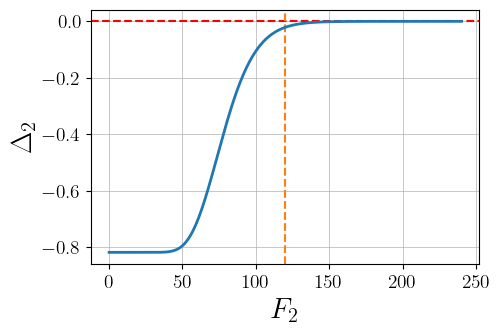

In [5]:
fig = plt.figure(figsize=(5,3.3))  #7,5
ax = fig.gca()
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.tick_params(axis='both', which='both', direction='in')
ax.set_xlabel(r'$F_2$', fontsize=21)
ax.set_ylabel(r'$\Delta_2$', fontsize=21)
ax.axhline(0, xmin=0, xmax=1, color='red',  linewidth=1.5, ls='dashed')
ax.axvline(120, ymin=0, ymax=1, color='tab:orange',  linewidth=1.5, ls='dashed')
#ax.set_xlim(0, 200) 
#ax.set_ylim(-0.5, 1) 

plt.plot(F2, Delta2, color='tab:blue', linewidth=2)
#plt.plot(S,gamma,color='tab:blue', linewidth=2)
#ax.set_title(r'${\rm Integration\,\, region}$', fontsize=20, color='black')   
ax.grid(linewidth=0.5)

## Vega

Vega gives the sensitivity to the implied volatility
$$ \mathcal{V} = \frac{\partial c}{\partial \sigma} = F_1 e^{-rT} e^{-d_1^2/2} \sqrt{T} $$

In [7]:
F1 = np.linspace(0,240,240)
r = 0.1
T = 2.
K = 20.
eps = 1.e-8  # This is to avoid divergences
#F1 = 400.
F2 = 100.
F = F1/(F2+K)
sigma1=0.1
sigma2=0.1
beta = sigma2*F2/(F2+K)
rho = 0. 
sigma = np.sqrt(sigma1**2.+beta**2.-2*rho*sigma1*beta)

# We use the analytic solution for the Call and Put pricing
d1 = (np.log(F) + (0.5*sigma**2.)*T)/(sigma*np.sqrt(T) + eps)
d2 = d1 - sigma*np.sqrt(T)

vega = F1*np.exp(-r*T)*np.exp(-d1**2./2.)*np.sqrt(T)

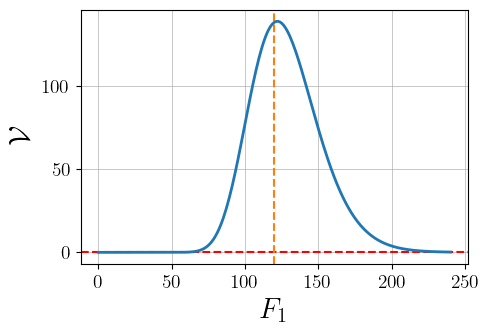

In [8]:
fig = plt.figure(figsize=(5,3.3)) 
ax = fig.gca()
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.tick_params(axis='both', which='both', direction='in', labelsize=14)
ax.set_xlabel(r'$F_1$', fontsize=21)
ax.set_ylabel(r'$\mathcal{V}$', fontsize=21)
ax.axhline(0, xmin=0, xmax=1, color='red',  linewidth=1.5, ls='dashed')
ax.axvline(120, ymin=0, ymax=1, color='tab:orange',  linewidth=1.5, ls='dashed')
#ax.set_xlim(0, 200) 
#ax.set_ylim(-0.5, 1) 

plt.plot(F1, vega, color='tab:blue', linewidth=2)
#plt.plot(S,gamma,color='tab:blue', linewidth=2)
#ax.set_title(r'${\rm Integration\,\, region}$', fontsize=20, color='black')   
ax.grid(linewidth=0.5)

In [9]:
F1 = np.linspace(0,250,250)
r = 0.
T = 10.
K = 20.
eps = 1.e-8  # This is to avoid divergences
#F1 = 400.
F2 = 100.
F = F1/(F2+K)
sigma1 = 0.1
sigma2 = 0.1
beta = sigma2*F2/(F2+K)
rho = 0. 
sigma = np.sqrt(sigma1**2.+beta**2.-2*rho*sigma1*beta)

# We use the analytic solution for the Call and Put pricing
d1 = (np.log(F) + (0.5*sigma**2.)*T)/(sigma*np.sqrt(T) + eps)
d2 = d1 - sigma*np.sqrt(T)
call = (F2+K)*np.exp(-r*T)*(F*ss.norm.cdf(d1) - ss.norm.cdf(d2))

T = 0.5
d1_smallT = (np.log(F) + (0.5*sigma**2.)*T)/(sigma*np.sqrt(T) + eps)
d2_smallT = d1_smallT - sigma*np.sqrt(T)
call_smallT = (F2+K)*np.exp(-r*T)*(F*ss.norm.cdf(d1_smallT) - ss.norm.cdf(d2_smallT))

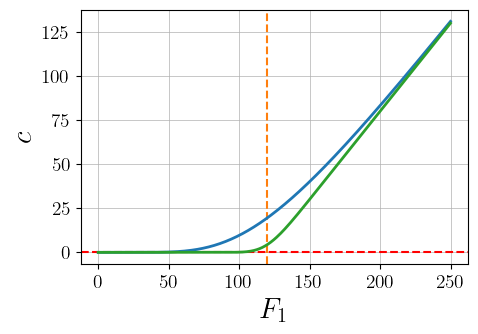

In [10]:
fig = plt.figure(figsize=(5,3.3)) 
ax = fig.gca()
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.tick_params(axis='both', which='both', direction='in', labelsize=14)
ax.set_xlabel(r'$F_1$', fontsize=21)
ax.set_ylabel(r'$c$', fontsize=21)
ax.axhline(0, xmin=0, xmax=1, color='red',  linewidth=1.5, ls='dashed')
ax.axvline(120, ymin=0, ymax=1, color='tab:orange',  linewidth=1.5, ls='dashed')
#ax.set_xlim(0, 200) 
#ax.set_ylim(-0.5, 1) 

plt.plot(F1, call, color='tab:blue', linewidth=2)
plt.plot(F1, call_smallT, color='tab:green', linewidth=2)
#plt.plot(S,gamma,color='tab:blue', linewidth=2)
#ax.set_title(r'${\rm Integration\,\, region}$', fontsize=20, color='black')   
ax.grid(linewidth=0.5)

In [5]:
F1 = np.linspace(0,250,250)
F2 = np.linspace(0,100,250)
X, Y = np.meshgrid(F1, F2)
r = 0.
T = 10.
K = 20.
eps = 1.e-8  # This is to avoid divergences
F = X/(Y+K)
sigma1 = 0.1
sigma2 = 0.1
beta = sigma2*Y/(Y+K)
rho = 0. 
sigma = np.sqrt(sigma1**2.+beta**2.-2*rho*sigma1*beta)

# We use the analytic solution for the Call and Put pricing
d1 = (np.log(F) + (0.5*sigma**2.)*T)/(sigma*np.sqrt(T) + eps)
d2 = d1 - sigma*np.sqrt(T)
call = (F2+K)*np.exp(-r*T)*(F*ss.norm.cdf(d1) - ss.norm.cdf(d2))

(0.0, 1000.0)

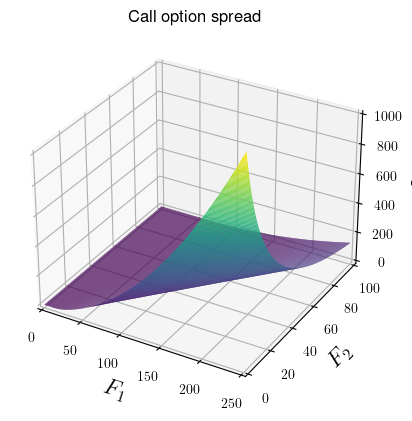

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, call, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Call option spread')

ax.set_xlabel(r'$F_1$', fontsize=17)
ax.set_ylabel(r'$F_2$', fontsize=17)
ax.set_zlabel(r'$c$', fontsize=17)

ax.set_xlim(0, 250)
ax.set_ylim(0, 100)
ax.set_zlim(0, 1000)